<a href="https://colab.research.google.com/github/Nomi230/ColabWork/blob/main/data_processing_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TRANSFORMERS_CACHE'] ="/scratch/project_2007260/HF_cache"
os.environ['HF_DATASETS_CACHE'] ="/scratch/project_2007260/HF_cache"
os.environ['PYTHONPATH']="/scratch/project_2007260/miniconda/envs/pytest"
os.environ['CONDA_PREFIX']="/scratch/project_2007260/miniconda/envs/pytest"


In [ ]:
import tarfile as tf
import os


In [ ]:
import pandas as pd
import numpy.random as random
from sklearn.model_selection import StratifiedShuffleSplit
from openpyxl import Workbook

In [ ]:
# dataset  = r'./cv-corpus-16.1-2023-12-06-en.tar.gz' [load dataset]
# if dataset.endswith("tar.gz"):     [unzip dataset]
#   tar=  tf.open(dataset, "r:gz")
#   tar.extractall()
#   tar.close()
# elif dataset.endswith("tar"):
#   tar=  tf.open(dataset,"r:")
#   tar.extractall()
#   tar.close()


In [ ]:
# Read validate file from dataset
data=pd.read_csv('./cv-corpus-16.1-2023-12-06/en/validated.tsv',sep='\t')

/run/nvme/job_23862063/tmp/ipykernel_2160747/838756817.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('./cv-corpus-16.1-2023-12-06/en/validated.tsv',sep='\t')


In [ ]:
print(data)

                                                 client_id  \
0        000abb3006b78ea4c1144e55d9d158f05a9db011016051...   
1        0013037a1d45cc33460806cc3f8ecee9d536c45639ba4c...   
2        0014c5a3e5715a54855257779b89c2bb498d470b225866...   
3        001509f4624a7dee75247f6a8b642c4a0d09f8be3eeea6...   
4        001519f234e04528a2b36158c205dbe61c8da45ab0242f...   
...                                                    ...   
1782448  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782449  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782450  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782451  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782452  372293e65cdab88771e028a4351651ab2eff64438ddafc...   

                                 path  \
0        common_voice_en_27710027.mp3   
1          common_voice_en_699711.mp3   
2        common_voice_en_21953345.mp3   
3        common_voice_en_18132047.mp3   
4        common_voice_en_27340672.mp3   
...      

In [ ]:
print(data.head())

                                           client_id  \
0  000abb3006b78ea4c1144e55d9d158f05a9db011016051...   
1  0013037a1d45cc33460806cc3f8ecee9d536c45639ba4c...   
2  0014c5a3e5715a54855257779b89c2bb498d470b225866...   
3  001509f4624a7dee75247f6a8b642c4a0d09f8be3eeea6...   
4  001519f234e04528a2b36158c205dbe61c8da45ab0242f...   

                           path  \
0  common_voice_en_27710027.mp3   
1    common_voice_en_699711.mp3   
2  common_voice_en_21953345.mp3   
3  common_voice_en_18132047.mp3   
4  common_voice_en_27340672.mp3   

                                            sentence  up_votes  down_votes  \
0  Joe Keaton disapproved of films, and Buster al...         3           1   
1                               She'll be all right.         2           1   
2                                                six         3           2   
3                         All's well that ends well.         2           0   
4  It is a busy market town that serves a large s...         2

In [ ]:
sampleData = pd.DataFrame(data)
#Remove unnecessary dataset columns
sampleData = sampleData.drop(['path' , 'up_votes', 'down_votes', 'variant', 'locale', 'segment'], axis=1)

In [ ]:
#count values according to age
sampleData['age'].value_counts()

age
twenties     432080
thirties     251986
fourties     167823
teens        105690
fifties      100551
sixties       80396
seventies     13753
eighties       1834
nineties        181
Name: count, dtype: int64

In [ ]:
#count values according to gender
sampleData['gender'].value_counts()

gender
male      831330
female    291338
other      33900
Name: count, dtype: int64

In [ ]:
nan_count = sampleData['gender'].isna().sum()
print(nan_count)

625885


In [ ]:
nan_count = sampleData['age'].isna().sum()
print(nan_count)

628159


In [ ]:
FinalSample = sampleData.dropna(subset=['age'])

# Print the cleaned DataFrame
print(FinalSample)

                                                 client_id  \
8        006015274fb2a0e44ffd95b6624a52ebf90b65f3e9beac...   
19       0101c1a1d24f05e6770cd09661f7549052bbf67b7debf1...   
41       02383add753a7c4520ae3da15d55f2e28815b016a174dc...   
65       030d0b51d96c93d1db9e4ba94dceaf341d98d51eb36820...   
76       0362a73c9aec0bd67a3b75284197554dcc4e56ea7d4c0a...   
...                                                    ...   
1782448  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782449  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782450  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782451  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782452  372293e65cdab88771e028a4351651ab2eff64438ddafc...   

                                                  sentence       age  gender  \
8                                         You are so rude!  thirties    male   
19       If you do not have your ticket, I cannot let y...  twenties  female   
41             

In [ ]:
nan_count = sampleData['gender'].isna().sum()
print(nan_count)

625885


In [ ]:
FinalSample['age'].value_counts()

age
twenties     432080
thirties     251986
fourties     167823
teens        105690
fifties      100551
sixties       80396
seventies     13753
eighties       1834
nineties        181
Name: count, dtype: int64

In [ ]:
FinalSample = sampleData.dropna(subset=['gender'])

# Print the cleaned DataFrame
print(FinalSample)

                                                 client_id  \
8        006015274fb2a0e44ffd95b6624a52ebf90b65f3e9beac...   
19       0101c1a1d24f05e6770cd09661f7549052bbf67b7debf1...   
41       02383add753a7c4520ae3da15d55f2e28815b016a174dc...   
65       030d0b51d96c93d1db9e4ba94dceaf341d98d51eb36820...   
76       0362a73c9aec0bd67a3b75284197554dcc4e56ea7d4c0a...   
...                                                    ...   
1782448  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782449  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782450  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782451  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782452  372293e65cdab88771e028a4351651ab2eff64438ddafc...   

                                                  sentence       age  gender  \
8                                         You are so rude!  thirties    male   
19       If you do not have your ticket, I cannot let y...  twenties  female   
41             

In [ ]:
LastSample = FinalSample.dropna(subset=['age'])

# Print the cleaned DataFrame
print(LastSample)

                                                 client_id  \
8        006015274fb2a0e44ffd95b6624a52ebf90b65f3e9beac...   
19       0101c1a1d24f05e6770cd09661f7549052bbf67b7debf1...   
41       02383add753a7c4520ae3da15d55f2e28815b016a174dc...   
65       030d0b51d96c93d1db9e4ba94dceaf341d98d51eb36820...   
76       0362a73c9aec0bd67a3b75284197554dcc4e56ea7d4c0a...   
...                                                    ...   
1782448  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782449  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782450  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782451  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782452  372293e65cdab88771e028a4351651ab2eff64438ddafc...   

                                                  sentence       age  gender  \
8                                         You are so rude!  thirties    male   
19       If you do not have your ticket, I cannot let y...  twenties  female   
41             

In [ ]:
LastSample = LastSample[LastSample['sentence'].str.split().str.len() > 10]

In [ ]:
print(LastSample)

                                                 client_id  \
19       0101c1a1d24f05e6770cd09661f7549052bbf67b7debf1...   
90       040595ac714a98d21fe0c2f36d96997900085115175065...   
98       0446e65032f30acdda12c87fef9d1de14d34946a4d2430...   
110      04c3d81414758eeca987b5abdd530bd17a007b593b021f...   
113      04d37f770b2c744fdacf3c2fca85fa289cdf912f8b497f...   
...                                                    ...   
1782439  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782443  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782445  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782450  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
1782452  372293e65cdab88771e028a4351651ab2eff64438ddafc...   

                                                  sentence       age  gender  \
19       If you do not have your ticket, I cannot let y...  twenties  female   
90       We should not take for granted how fortunate w...  fourties    male   
98       Geils 

In [ ]:
LastSample['gender'].value_counts()

gender
male      339497
female    127276
other      14497
Name: count, dtype: int64

In [ ]:

sentence_counts = LastSample['accents'].value_counts()
wb = Workbook()
ws = wb.active
ws.title = 'accents Counts'

ws.cell(row=1, column=1).value = 'accents'
ws.cell(row=1, column=2).value = 'Count'

row_counter = 2
for sentence, count in sentence_counts.items():
  ws.cell(row=row_counter, column=1).value = sentence
  ws.cell(row=row_counter, column=2).value = count
  row_counter += 1


wb.save('accents_counts_updated.xlsx')

In [ ]:
LastSample['accents'].value_counts()

accents
United States English                                                             164011
England English                                                                    50937
India and South Asia (India, Pakistan, Sri Lanka)                                  45932
Canadian English                                                                   29793
German English,Non native speaker                                                  24639
                                                                                   ...  
Canadian English,SerpentX                                                              1
England English,femalepublic school accent, quiet and under articualted finals         1
England English,India and South Asia (India, Pakistan, Sri Lanka)                      1
Выраженный украинский акцент                                                           1
Chinese                                                                                1
Name: count, 

In [ ]:
def split_data(LastSample, age_groups, num_per_group=25):
    for age_group in age_groups:
        for gender in ['male', 'female']:
            age_group_data = LastSample.loc[(LastSample['age'] == age_group) & (LastSample['age'] == age_group) & (LastSample['gender'] == gender)]
            train_data = age_group_data.sample(min(len(age_group_data), num_per_group))
            test_data = age_group_data.drop(train_data.index)[:num_per_group]
            dev_data = age_group_data.drop(train_data.index).drop(test_data.index)
            if not train_data.empty:
                train_data.to_csv(f"{age_group}_{gender}_train.tsv", sep="\t", index=False)
            if not test_data.empty:
                test_data.to_csv(f"{age_group}_{gender}_test.tsv", sep="\t", index=False)
            if not dev_data.empty:
                dev_data.to_csv(f"{age_group}_{gender}_dev.tsv", sep="\t", index=False)


age_groups = ["teens", "twenties", "thirties", "fourties", "fifties", "sixties", "seventies", "eighties", "nineties"]
split_data(LastSample, age_groups)

print("Successfully created TSV files (3 per age group/gender, skipping empty sets)!")


Successfully created TSV files (3 per age group/gender, skipping empty sets)!


In [ ]:


# Create a dictionary to store results
results = {}

# Group data by age group
grouped_data = LastSample.groupby('age')

# Process data within each group
for age_group, group_df in grouped_data:
  gender_counts = group_df['gender'].value_counts().to_dict()

  # Create a temporary list to store accent counts with labels (age group & gender)
  accent_list = []
  for index, row in group_df.iterrows():
    accent = row['accents']
    if accent:  # Consider only valid accents (not None)
      label = f"{age_group} - {row['gender']}"
      accent_list.append((label, accent))

  # Count unique accents and combine with labels
  accent_counts = dict(pd.Series(accent_list).value_counts())

  # Store results for this age group
  results[age_group] = {
      'Total': len(group_df),
      'Gender': gender_counts,
      'Accents': accent_counts
  }

# Create a new workbook and sheet
wb = Workbook()
ws = wb.active
ws.title = 'Age Group Breakdown'

# Write headers (adjust column widths as needed)
row = 1
col = 1
ws.cell(row=row, column=col).value = 'Age Group'
col += 1
ws.cell(row=row, column=col).value = 'Total'
col += 1
ws.cell(row=row, column=col).value = 'Gender'
col += 1
ws.cell(row=row, column=col).value = 'Accents'

# Write data for each age group
row = 2
for age_group, counts in results.items():
  col = 1
  ws.cell(row=row, column=col).value = age_group
  col += 1
  ws.cell(row=row, column=col).value = counts['Total']
  col += 1

  # Write gender breakdown
  for gender, count in counts['Gender'].items():
    ws.cell(row=row, column=col).value = gender + ': ' + str(count)
    col += 1

  # Write accent breakdown (if any)
  if counts['Accents']:
        for label, accent in counts['Accents'].items():
    # Combine label, colon, and accent into a single string
            combined_value = f"{label}: {accent}"
            ws.cell(row=row, column=col).value = combined_value
            col += 1
        row += 1

# Save the workbook
wb.save('age_group_breakdown_improved2.xlsx')

In [ ]:
# Directory containing TSV files im running this one 15.21
directory = "./FinalDataset"

results = []

# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".tsv"):
        # Read the TSV file
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='\t')

        # Check if the 'sentence' column exists
        if 'accents' in df.columns:
            # Count words in each sentence and sum them
            total_word_count = df['accents'].apply(lambda x: len(str(x).split())).sum()

            # Append the result to the list
            results.append({'File': filename, 'Total_accents_Count': total_word_count})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Save the results to an Excel file
output_file = 'total_accents_counts_updated.xlsx'
results_df.to_excel(output_file, index=False)

print(f"Total word counts saved to {output_file}")

Total word counts saved to total_accents_counts_updated.xlsx


In [ ]:
# Directory containing TSV files
directory = "./FinalDataset"
results = []


# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".tsv"):
        # Read the TSV file
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='\t')

        # Initialize a dictionary to store counts
        file_result = {'File': filename, 'Accents': {}}

        # Check if the 'accents' column exists and count accents
        if 'accents' in df.columns:
            accent_counts = df['accents'].value_counts().to_dict()
            file_result['Accents'] = accent_counts

        # Append the result to the list
        results.append(file_result)

# Prepare data for output
output_data = []
for result in results:
    file = result['File']
    accents = result['Accents']

    for accent, count in accents.items():
        # Assuming the accent format is "country_accent"
        if "_" in accent:
            country, accent_type = accent.split('_')
        else:
            country, accent_type = accent, "unknown"

        output_data.append({'File': file, 'Country': country, 'Accent': accent_type, 'Accent_Count': count})

# Create a DataFrame from the output data
output_df = pd.DataFrame(output_data)

# Save the results to an Excel file
output_file = 'accent_counts_updated.xlsx'
output_df.to_excel(output_file, index=False)

print(f"Accent counts saved to {output_file}")

Accent counts saved to accent_counts_updated.xlsx


In [ ]:
from sklearn.model_selection import train_test_split

df = LastSample

# Function to create train, test, and dev sets for a specific age group
def create_age_group_files(df, age_group, train_file, test_file, dev_file, n_samples=25):
    age_group_df = df[df['age'] == age_group]
    male_df = age_group_df[age_group_df['gender'] == 'male']
    female_df = age_group_df[age_group_df['gender'] == 'female']
    other_df = age_group_df[~age_group_df['gender'].isin(['male', 'female'])]

# Sample rows
    sampled_male_df = male_df.sample(n=min(n_samples, len(male_df)), random_state=42)
    sampled_female_df = female_df.sample(n=min(n_samples, len(female_df)), random_state=42)

    remaining_male_needed = n_samples - len(sampled_male_df)
    remaining_female_needed = n_samples - len(sampled_female_df)

# Fill gaps with 'other' gender rows if necessary
    if remaining_male_needed > 0:
        other_male_df = other_df.sample(n=min(remaining_male_needed, len(other_df)), random_state=42)
        sampled_male_df = pd.concat([sampled_male_df, other_male_df])
        other_df = other_df.drop(other_male_df.index)

    if remaining_female_needed > 0:
        other_female_df = other_df.sample(n=min(remaining_female_needed, len(other_df)), random_state=42)
        sampled_female_df = pd.concat([sampled_female_df, other_female_df])
        other_df = other_df.drop(other_female_df.index)

# Combine male and female samples for train and test
    sampled_df = pd.concat([sampled_male_df, sampled_female_df])

# Split into train and test
    train_df, test_df = train_test_split(sampled_df, test_size=0.5, random_state=42)

# The dev set includes all remaining rows for the age group
    dev_df = age_group_df.drop(sampled_df.index)

# Save to files
    train_df.to_csv(train_file, sep='\t', index=False)
    test_df.to_csv(test_file, sep='\t', index=False)
    dev_df.to_csv(dev_file, sep='\t', index=False)

# Create files for each age group
create_age_group_files(df, 'seventies', 'seventies_train.tsv', 'seventies_test.tsv', 'seventies_dev.tsv')
create_age_group_files(df, 'eighties', 'eighties_train.tsv', 'eighties_test.tsv', 'eighties_dev.tsv')
create_age_group_files(df, 'nineties', 'nineties_train.tsv', 'nineties_test.tsv', 'nineties_dev.tsv')

print("Files created successfully.")

Files created successfully.


In [ ]:
df = LastSample


# Function to create train, test, and dev sets for a specific age group and gender
def create_gender_files(df, age_group, gender, prefix, n_samples=25):
# Filter the dataframe for the specified age group and gender
    age_gender_df = df[(df['age'] == age_group) & (df['gender'] == gender)]

# Sample the rows
    sampled_df = age_gender_df.sample(n=min(n_samples, len(age_gender_df)), random_state=42)

# Determine the remaining rows needed if the sample is less than the required samples
    remaining_needed = n_samples - len(sampled_df)

# If more rows are needed, fill in with 'other' gender
    if remaining_needed > 0:
        other_df = df[(df['age'] == age_group) & (~df['gender'].isin(['male', 'female']))]
        additional_df = other_df.sample(n=min(remaining_needed, len(other_df)), random_state=42)
        sampled_df = pd.concat([sampled_df, additional_df])

    # Split into train and test sets
    train_df, test_df = train_test_split(sampled_df, test_size=0.5, random_state=42)

    # Create the dev set from the remaining rows for the age group and gender
    # Also include remaining 'other' gender rows to the dev set
    dev_df = age_gender_df[~age_gender_df.index.isin(sampled_df.index)]
    remaining_other_df = df[(df['age'] == age_group) & (~df['gender'].isin(['male', 'female'])) & (~df.index.isin(sampled_df.index))]
    dev_df = pd.concat([dev_df, remaining_other_df]).drop_duplicates()

    # Save to files
    train_file = f'{prefix}_train.tsv'
    test_file = f'{prefix}_test.tsv'
    dev_file = f'{prefix}_dev.tsv'
    train_df.to_csv(train_file, sep='\t', index=False)
    test_df.to_csv(test_file, sep='\t', index=False)
    dev_df.to_csv(dev_file, sep='\t', index=False)

# Create files for each age group and gender
for age_group in ['seventies', 'eighties', 'nineties']:
    for gender in ['male', 'female']:
        prefix = f'{age_group}_{gender}'
        create_gender_files(df, age_group, gender, prefix)

print("Files created successfully.")


Files created successfully.


In [ ]:
df = LastSample

# Filter for ages in the eighties and nineties
df_filtered = df[(df['age'] >= 'eighties') & (df['age'] < 'nineties')]

# Filter for gender not being male or female
df_filtered = df_filtered[(df['gender'] != 'male') & (df['gender'] != 'female')]

# Split the dataset into train and test sets (50-50 split)
train_df, test_df = train_test_split(df_filtered, test_size=0.5, random_state=42)

# Save to TSV files
train_df.to_csv('train.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

/run/nvme/job_21865408/tmp/ipykernel_2991188/4090242738.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['gender'] != 'male') & (df['gender'] != 'female')]


In [ ]:
df = LastSample

df_eighties = df[df['age'] == 'eighties']
df_nineties = df[df['age'] == 'nineties']

# Filter for gender not being male or female
df_eighties_filtered = df_eighties[(df_eighties['gender'] != 'male') & (df_eighties['gender'] != 'female')]
df_nineties_filtered = df_nineties[(df_nineties['gender'] != 'male') & (df_nineties['gender'] != 'female')]

# Save to TSV files
df_eighties_filtered.to_csv('eighties.train.tsv', sep='\t', index=False)
df_nineties_filtered.to_csv('nineties.train.tsv', sep='\t', index=False)

In [ ]:

# Directory containing TSV files
directory = './FinalDataset'

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['File', 'Sentence', 'Word_Count'])

# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".tsv"):
        # Read the TSV file
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='\t')

        # Check if the 'sentence' column exists
        if 'sentence' in df.columns:
            # Count words in each sentence
            df['Word_Count'] = df['sentence'].apply(lambda x: len(str(x).split()))

            # Append the results to the DataFrame
            temp_df = df[['sentence', 'Word_Count']].copy()
            temp_df['File'] = filename
            results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Reorder the columns
results_df = results_df[['File', 'sentence', 'Word_Count']]

# Save the results to an Excel file
output_file = 'word_counts_updated.xlsx'
results_df.to_excel(output_file, index=False)

print(f"Word counts saved to {output_file}")


Word counts saved to word_counts_updated.xlsx


In [ ]:
df = pd.read_excel('./FemaleEvaluation.xlsx')
print(df)

    Age Group        Model        WER  Substitution  insertion  deletion
0       teens      Whisper  19.035533            59          8         8
1       teens      Wav2Vec  19.289340            61          9         6
2       teens          MMS  19.289340            65          8         3
3       teens  HubertModel  18.781726            58          7         9
4    twenties      Whisper  25.566343            62          4        13
5    twenties      Wav2Vec  32.362460            81         11         8
6    twenties          MMS  25.889968            68          8         4
7    twenties  HubertModel  32.686084            80         11        10
8    Thirties      Whisper  11.718750            32          6         7
9    Thirties      Wav2Vec  16.927083            46          3        16
10   Thirties          MMS  15.104167            46          3         9
11   Thirties  HubertModel  17.187500            49          1        16
12   Fourties      Whisper  10.169492            35

In [ ]:
import seaborn as sns

<Axes: xlabel='Age Group', ylabel='WER'>

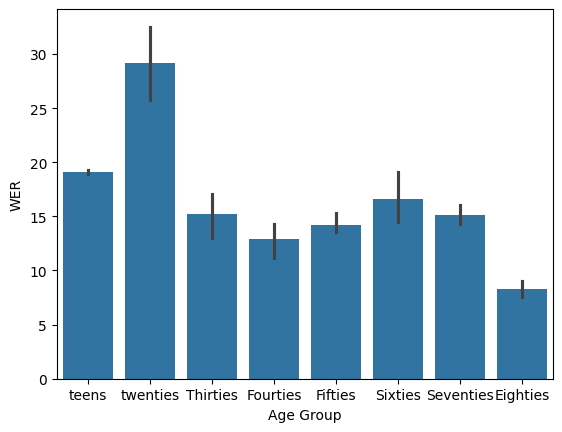

In [ ]:
sns.barplot(x="Age Group", y="WER", data=df)

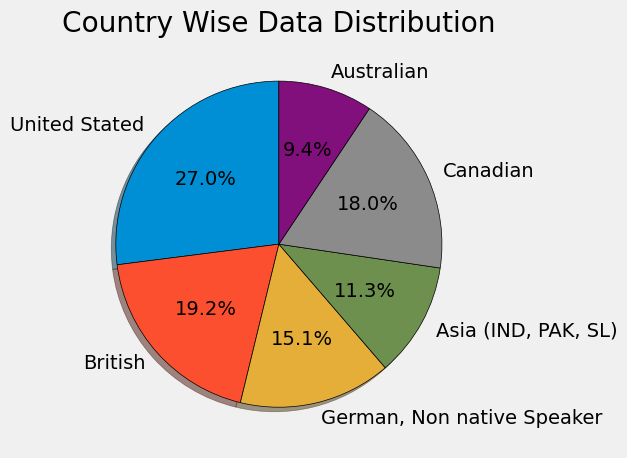

In [ ]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

slices = [44054, 31283, 24639,  18499, 29293, 15279]
labels = ['United Stated', 'British', 'German, Non native Speaker','Asia (IND, PAK, SL)' , 'Canadian', 'Australian']


plt.pie(slices, labels=labels,  shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Country Wise Data Distribution")
plt.tight_layout()
plt.show()

In [ ]:
dfM = pd.read_excel('./MaleEvaluation.xlsx')
print(dfM)

    Age Group        Model        Wer  Substitution  Insertion  Deletion
0       teens      Whisper  22.397476            55          3        13
1       teens      Wav2Vec  23.343849            58          9         7
2       teens          MMS  24.605678            65          8         5
3       teens  HubertModel  24.921136            62          8         9
4    twenties      Whisper  24.761905            64          5         9
5    twenties      Wav2Vec  32.063492            80         14         7
6    twenties          MMS  29.841270            77         11         6
7    twenties  HubertModel  28.888889            74          9         8
8    Thirties      Whisper  25.236593            60          5        15
9    Thirties      Wav2Vec  25.236593            63          6        11
10   Thirties          MMS  26.813880            71          5         9
11   Thirties  HubertModel  28.075710            69          7        13
12   Fourties      Whisper  21.148036            53

In [ ]:

def count_words_in_files(directory):
  word_counts = {}
  for filename in os.listdir(directory):
    if filename.startswith('tid_') and filename.endswith('_dev'):
      with open(os.path.join(directory, filename), 'r') as file:
        words = file.read().split()
        word_counts[filename] = len(words)
  return word_counts

if __name__ == "__main__":
  directory = "./FinalDataset/ASR"
  word_counts = count_words_in_files(directory)

  for filename, count in word_counts.items():
    print(f"{filename}: {count} words")


tid_fourties_male_dev: 1496725 words
tid_thirties_female_dev: 447366 words
tid_nineties_female_dev: 0 words
tid_teens_female_dev: 306431 words
tid_teens_combined_dev: 907605 words
tid_fifties_female_dev: 320919 words
tid_sixties_female_dev: 415863 words
tid_eighties_combined_dev: 16679 words
tid_eighties_male_dev: 14371 words
tid_thirties_combined_dev: 2385636 words
tid_seventies_female_dev: 33659 words
tid_seventies_combined_dev: 128400 words
tid_nineties_combined_dev: 1363 words
tid_thirties_male_dev: 1938270 words
tid_teens_male_dev: 601174 words
tid_fourties_female_dev: 364665 words
tid_twenties_female_dev: 1059512 words
tid_fourties_combined_dev: 1861390 words
tid_twenties_combined_dev: 4201548 words
tid_fifties_male_dev: 1039632 words
tid_fifties_combined_dev: 1360551 words
tid_nineties_male_dev: 1363 words
tid_eighties_female_dev: 2308 words
tid_twenties_male_dev: 3142036 words
tid_seventies_male_dev: 94741 words
tid_sixties_male_dev: 402082 words
tid_sixties_combined_dev: 81794

In [ ]:
def count_words_in_files(directory):
  """Counts the total number of words in each file within a directory.

  Args:
      directory: The path to the directory containing the files.

  Returns:
      A dictionary where keys are filenames and values are word counts.
  """

  word_counts = {}
  for filename in os.listdir(directory):
    # Include any valid file extension (modify if needed)
    if os.path.isfile(os.path.join(directory, filename)):
      with open(os.path.join(directory, filename), 'r') as file:
        words = file.read().split()
        word_counts[filename] = len(words)
  return word_counts

if __name__ == "__main__":
  directory = "./FinalDataset"  # Replace with your directory path
  word_counts = count_words_in_files(directory)

  for filename, count in word_counts.items():
    print(f"{filename}: {count} words")

teens_male_train.tsv: 452555 words
twenties_male_train.tsv: 2369573 words
fifties_female_train.tsv: 252266 words
eighties_male_test.tsv: 444 words
teens_female_train.tsv: 235540 words
fifties_male_test.tsv: 423 words
fourties_male_train.tsv: 1052511 words
eighties_male_train.tsv: 10325 words
thirties_female_train.tsv: 308207 words
nineties_male_test.tsv: 467 words
seventies_female_train.tsv: 25011 words
teens_female_dev.tsv: 440 words
fourties_male_test.tsv: 456 words
fourties_female_dev.tsv: 474 words
sixties_female_test.tsv: 447 words
thirties_male_dev.tsv: 456 words
eighties_female_train.tsv: 1374 words
nineties_male_train.tsv: 557 words
thirties_female_test.tsv: 436 words
teens_male_test.tsv: 462 words
twenties_female_train.tsv: 934347 words
seventies_male_dev.tsv: 440 words
fifties_female_dev.tsv: 463 words
seventies_female_dev.tsv: 436 words
seventies_male_test.tsv: 437 words
fourties_male_dev.tsv: 468 words
thirties_male_test.tsv: 436 words
fifties_female_test.tsv: 460 words
bas